In [1]:

import sys
from loguru import logger
import random
import time

logger.remove()
logger.add(sys.stdout, colorize=True,format="<level>{level}</level> | <blue>{message}</blue>")
class TimerError(Exception):
    def __init__(self) -> None:
        self._start_time = None 
        self._stop_time = None 
        self.elapsed_time = None
        
    def start(self):
        if self._start_time != None:
            raise TimerError(" please stop the timer")
        self._start_time = time.perf_counter()
        self._stop_time = None
    
    def stop(self):
        if self._start_time == None:
            raise TimerError("please start the timer")
        self._stop_time = time.perf_counter()
        self.elapsed_time = self._stop_time - self._start_time
        self._start_time = None 
    def elapsed(self):
        if self.elapsed == None and self._start_time== None:
            raise TimerError("the counter not running")
        else:
            self.stop()
            return self.elapsed_time
    def __str__(self) -> str:
        return (str(self.elapsed_time))

T =TimerError()
T.start()
end_time = T.elapsed()
logger.info(f"time taken:{end_time}")

INFO | time taken:2.2756998077966273e-05



**Merge needs to create a new list to hold the merged elements**
- No obvious way to efficiently merge two lists in place
- Extra storage can be costly
Inherently recursive
- **Recursive calls and returns are expensive**



# quick sorting 

1. select the median 
2. recursively sort the left and right 
$$ \begin{array}{l}
recurrence\ T( n) \ =\ 2\ T\left(\frac{n}{2}\right) +\ n\ \\
-\ Rearranging\ is\ =\ O( n)\\
T( n) \ =\ O( nlogn)
\end{array}$$


how to find the median ?

choose a pivot element 

- [C.A.R Hoare]

In [15]:
def quicksort(L: list, lower_index: int , upper_index: int):
    """
    Sorts a list using the Quicksort algorithm.

    Parameters:
        L (list): The list to be sorted.
        lower_index (int): The lower index of the sublist to be sorted (default is 0).
        upper_index (int): The upper index of the sublist to be sorted.

    Returns:
        list: The sorted list.
    """
    if upper_index - lower_index <= 1:
        return L

    pivot = L[lower_index]
    lower = lower_index + 1
    upper = lower_index + 1

    for i in range(lower_index + 1, upper_index):
        if L[i] > pivot:
            L[i], L[upper] = L[upper], L[i]
            upper += 1
        else:
            L[i], L[lower] = L[lower], L[i]
            lower += 1

    # Move pivot between lower and upper
    L[lower - 1], L[lower_index] = L[lower_index], L[lower - 1]
    
    # Recursive calls
    quicksort(L, lower_index=lower_index, upper_index=lower - 1)
    quicksort(L, lower_index=lower, upper_index=upper_index)

    
    return L


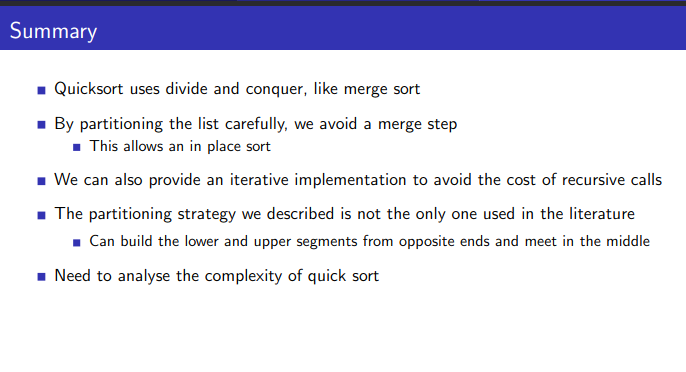

In [24]:
L = [ random.randint(1,100) for i in range(100000)]
V= random.randint(1,100)

In [25]:
T =TimerError()
T.start()
quicksort(L, 0 , len(L))
end_time = T.elapsed()
logger.info(f"time taken:{end_time}")

INFO | time taken:0.6071723460045177
